#### <strong>第三次作品：分類器的原理與評比實驗</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標</font>：
- 使用標準化資料以及主成分資料進行模型訓練，並分為訓練集與測試集。

- 使用三種分類器進行訓練與測試。

- 比較不同資料對於不同分類器之訓練結果的準確率。

<hr>

#### <strong><font color=cornflowerblue>第一部分 : </font></strong> 
#### <strong><font color=lightsteelblue>準備資料(讀入資料)</font></strong> 

以下程式碼為將讀入來自 Yale Face 38 個人的人臉影像，總共 2410 張，每張大小 192×168。

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import os

np.random.seed(0)
def show_montage(X, n, m, h, w):
    '''
    X: 影像資料矩陣，每行代表一張影像
    n,m: 每張影像的大小 nxm
    h,w: 建立一個蒙太奇圖陣，大小 figsize=(w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: 
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

D = scipy.io.loadmat('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/mat/allFaces.mat')
X = D['faces'] # 32256 x 2410, each column represents an image 
y = np.ndarray.flatten(D['nfaces'])
m = int(D['m']) # 168
n = int(D['n']) # 192
#n_persons = int(D['person']) # 38
n_persons = D['person'].item()

/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_59772/3740022345.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m']) # 168
/var/folders/q1/b0ndsqyd5hldwkvkh_hw1d180000gn/T/ipykernel_59772/3740022345.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n']) # 192


以下程式碼將顯示資料中的38張人臉圖像

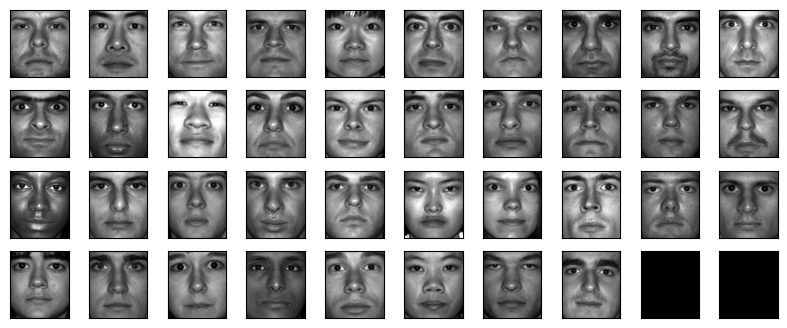

In [33]:
all_diff_persons = np.zeros((m*n, n_persons)) 
cnt = 0
for i in range(n_persons):
   all_diff_persons[:,i] = X[:,cnt] 
   cnt = cnt + y[i]
show_montage(all_diff_persons, n, m, 4,10)

#### <strong><font color=lightsteelblue>準備資料(分離資料、標準化資料)</font></strong> 
將讀入的耶魯人臉資料中的X、y分別以 7:3 的比例切割成訓練與測試集，最後得到共4組資料集。

接著對 X 的訓練與測試集分別標準化以便在後續的分類器中使用。

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 準備 y 的標籤
y_labels = np.repeat(np.arange(len(y)), y)  # 生成 y 的標籤
## 另一種生成 y 標籤的迴圈寫法
y_labels = np.zeros(y[0]).astype('int')
for i in np.arange(1, len(y)):
    tmp = ((np.ones(y[i])*i).astype('int'))
    y_labels = np.append(y_labels, tmp)


# 使用標準化資料
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X.T, y_labels, test_size = test_size)

scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

#### <strong><font color=cornflowerblue>第二部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用標準化後之原始資料</font></strong> 


以下程式碼目的是對訓練集資料使用 Logistic Regression 訓練模型並測試準確率。

其中為了時間成本以及對不同分類器的方便比較，因此演算法皆使用 'lbfgs' ，測試結果準確率為 94.47%。

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0) #default:tol=1e-4
#verbose=1 顯示中間過程
#tol:停止條件，max_iter:最大迭代次數，verbose:是否顯示訓練過程
# tol數字越小則絢練越久，停止條件越嚴格
#max_iter數字越大，迭代次數越多
solver = 'lbfgs' # ’lbfgs’ is the default  #指定演算法
#solver = 'liblinear'
#solver = 'newton-cg'
clf_LR_original = LogisticRegression(solver = solver, **opts) 
clf_LR_original.fit(X_train, y_train)
y_pred = clf_LR_original.predict(X_test)
# 測試資料之準確率回報 
print(f"{accuracy_score(y_test, y_pred):.2%}\n") 
print(f"{clf_LR_original.score(X_test, y_test):.2%}\n") 
print(classification_report(y_test, y_pred))

94.47%

94.47%

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.65      1.00      0.79        13
           2       0.84      0.94      0.89        17
           3       1.00      0.95      0.97        20
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        11
           6       1.00      0.85      0.92        20
           7       0.95      0.88      0.91        24
           8       0.89      0.76      0.82        21
           9       0.90      0.95      0.93        20
          10       1.00      0.89      0.94        19
          11       1.00      0.95      0.97        20
          12       1.00      0.84      0.91        19
          13       1.00      1.00      1.00        15
          14       0.93      1.00      0.96        27
          15       1.00      0.91      0.95        22
          16       1.00      1.00      1.00        17
          1

#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Support Vector Machine 訓練模型並測試準確率，因為在先前的資料中線性 SVM 的表現都較其他核函數來得好，因此在此大型的人臉資料中，僅使用線性 SVM ，其準確率皆為 94.74% 。

In [42]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \ # tol = 1e−6, max_iter = int(1e6))
#clf_svm = SVC(kernel="linear", **opts)
#clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
#clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts )
clf_svm = LinearSVC(**opts) # one vs the rest 
clf_svm.fit(X_train, y_train)
predictions = clf_svm.predict(X_test) 
print(classification_report(y_test, predictions))
print(f"{accuracy_score(y_test, y_pred):.2%}\n") 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.77      0.96      0.86        25
           2       0.96      1.00      0.98        24
           3       1.00      0.95      0.98        22
           4       0.90      0.95      0.93        20
           5       1.00      0.91      0.95        22
           6       0.94      0.94      0.94        17
           7       0.85      0.85      0.85        20
           8       1.00      1.00      1.00        24
           9       0.88      0.95      0.91        22
          10       0.89      0.89      0.89        18
          11       1.00      0.86      0.92        21
          12       1.00      0.90      0.95        20
          13       0.93      0.81      0.87        16
          14       0.89      0.89      0.89        19
          15       0.95      0.95      0.95        22
          16       0.92      1.00      0.96        11
          17       1.00    

#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率。

其中為了時間成本以及對不同分類器的方便比較，因此演算法使用 'lbfgs' 
，其準確率為 94.74%

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       968888     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71825D+00    |proj g|=  4.76901D-02


 This problem is unconstrained.



At iterate    1    f=  3.65937D+00    |proj g|=  1.82977D-02

At iterate    2    f=  3.64981D+00    |proj g|=  1.03335D-02

At iterate    3    f=  3.64687D+00    |proj g|=  1.19898D-02

At iterate    4    f=  3.64497D+00    |proj g|=  1.17256D-02

At iterate    5    f=  3.64382D+00    |proj g|=  9.28049D-03

At iterate    6    f=  3.64346D+00    |proj g|=  9.28783D-03

At iterate    7    f=  3.64342D+00    |proj g|=  9.28858D-03

At iterate    8    f=  3.64331D+00    |proj g|=  9.29284D-03

At iterate    9    f=  3.64329D+00    |proj g|=  9.29357D-03

At iterate   10    f=  3.64323D+00    |proj g|=  9.28371D-03

At iterate   11    f=  3.64315D+00    |proj g|=  9.28083D-03

At iterate   12    f=  3.64294D+00    |proj g|=  9.25870D-03

At iterate   13    f=  3.64244D+00    |proj g|=  1.05280D-02

At iterate   14    f=  3.63018D+00    |proj g|=  1.18761D-02

At iterate   15    f=  3.62964D+00    |proj g|=  1.18709D-02

At iterate   16    f=  3.62783D+00    |proj g|=  1.17349D-02

At iter

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       0.53      0.69      0.60        13
           1       0.57      0.48      0.52        25
           2       0.60      0.38      0.46        24
           3       0.67      0.64      0.65        22
           4       0.79      0.55      0.65        20
           5       0.75      0.68      0.71        22
           6       0.62      0.47      0.53        17
           7       0.56      0.70      0.62        20
           8       0.69      0.83      0.75        24
           9       0.57      0.59      0.58        22
          10       0.67      0.56      0.61        18
          11       0.52      0.57      0.55        21
          12       0.79      0.55      0.65        20
          13       0.50      0.69      0.58        16
          14       0.62      0.79      0.70        19
          15       0.65      0.59      0.62        22
          16       0.33      0.55      0.41        11
          17       0.54    

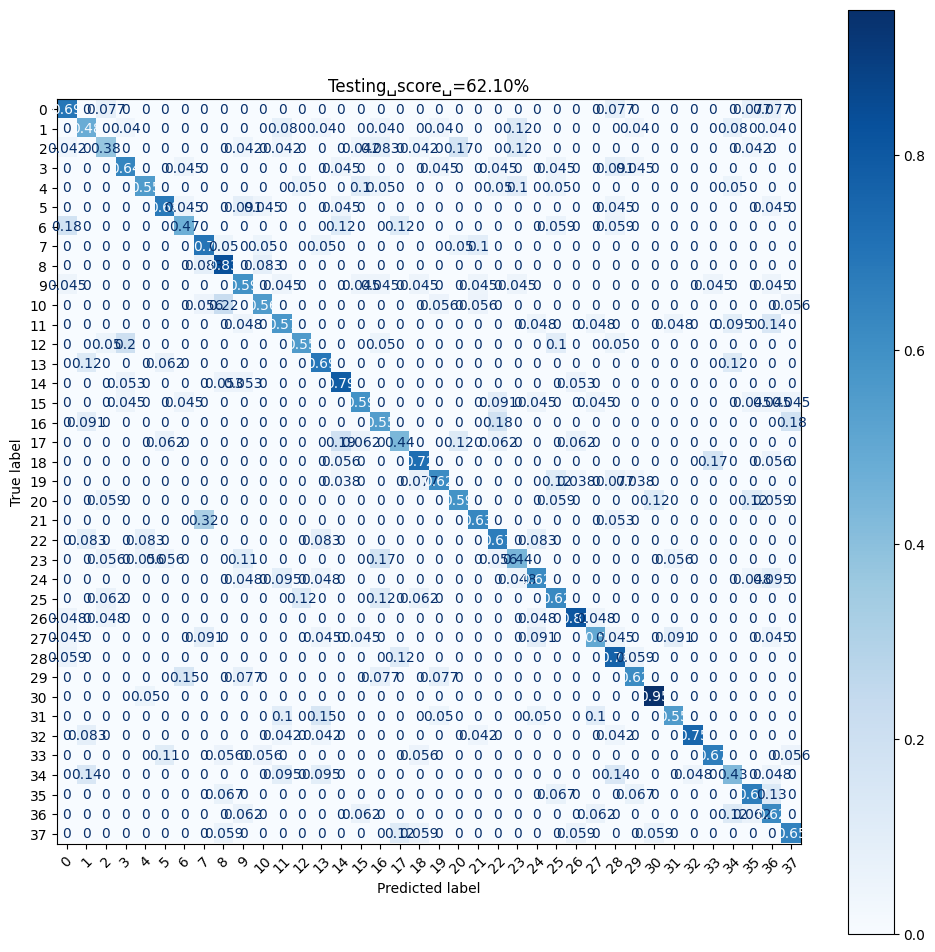

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#hidden_layers = (512,) # one hidden layer 
# activation = ’relu’ # the default 
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose =True, \
              activation = activation, tol = 1e-6, max_iter = int(1e6))
#solver = 'sgd' # not efficient, need more tuning 
solver = 'lbfgs' # not suitable here
#solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts) #神經網路
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test) 
print(classification_report(y_test, predictions))
print(f"{accuracy_score(y_test, y_pred):.2%}\n") 




from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 1, figsize=(12,12)) 
score = 100*clf_MLP.score(X_test, y_test) 
title = 'Testing␣score␣={:.2f}%'.format(score)
disp = ConfusionMatrixDisplay.from_estimator( 
    clf_MLP,
    X_test,
    y_test,
    xticks_rotation=45, #’vertical’, # display_labels=class_names, 
    cmap=plt.cm.Blues, 
    normalize='true',
    ax = ax
    ) 
disp.ax_.set_title(title) 
plt.show()

#### <strong><font color=cornflowerblue>第三部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用主成分PCA資料</font></strong> 

以下程式碼為將原始資料進行主成分分析，並試製 random_state 確保使用資料相同。

其中使用了前50個主成分，可以包含到原始資料中89.43%的資訊。

In [3]:
from sklearn.decomposition import PCA

random_state = 25

pca = PCA(n_components = 20).fit(X_train) #設定取幾個conponents
Z_train = pca.transform(X_train) 
Z_test = pca.transform(X_test)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio for each component
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {explained_variance:.4f}")

# Print cumulative explained variance ratio
for i, cumulative_variance in enumerate(cumulative_explained_variance_ratio):
    print(f"Cumulative Variance up to Principal Component {i+1} = {cumulative_variance:.4f}")


Principal Component 1: Explained Variance Ratio = 0.3584
Principal Component 2: Explained Variance Ratio = 0.3533
Principal Component 3: Explained Variance Ratio = 0.0490
Principal Component 4: Explained Variance Ratio = 0.0283
Principal Component 5: Explained Variance Ratio = 0.0148
Principal Component 6: Explained Variance Ratio = 0.0137
Principal Component 7: Explained Variance Ratio = 0.0113
Principal Component 8: Explained Variance Ratio = 0.0094
Principal Component 9: Explained Variance Ratio = 0.0072
Principal Component 10: Explained Variance Ratio = 0.0068
Principal Component 11: Explained Variance Ratio = 0.0066
Principal Component 12: Explained Variance Ratio = 0.0052
Principal Component 13: Explained Variance Ratio = 0.0050
Principal Component 14: Explained Variance Ratio = 0.0044
Principal Component 15: Explained Variance Ratio = 0.0039
Principal Component 16: Explained Variance Ratio = 0.0038
Principal Component 17: Explained Variance Ratio = 0.0035
Principal Component 18:

以下程式碼目的是對主成分資料中的訓練集資料使用 Logistic Regression 訓練模型並測試準確率。
其中為了時間成本以及對不同分類器的方便比較，因此演算法皆使用 'lbfgs' ，其準確率結果為 76.49%。

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=0) 
solver = 'lbfgs' # ’lbfgs’ is the default
#solver = 'liblinear'
#solver = 'newton-cg'
clf_PCA = LogisticRegression(solver = solver, **opts) 
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(f"{accuracy_score(y_test, y_pred):.2%}\n") 
print(classification_report(y_test, y_pred))

76.49%

76.49%

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.71      0.92      0.80        13
           2       0.71      0.88      0.79        17
           3       0.67      0.50      0.57        20
           4       0.92      1.00      0.96        23
           5       0.50      0.82      0.62        11
           6       0.76      0.65      0.70        20
           7       0.63      0.71      0.67        24
           8       0.80      0.76      0.78        21
           9       0.76      0.80      0.78        20
          10       0.80      0.84      0.82        19
          11       0.79      0.75      0.77        20
          12       0.71      0.79      0.75        19
          13       0.79      0.73      0.76        15
          14       0.86      0.67      0.75        27
          15       0.75      0.68      0.71        22
          16       0.83      0.88      0.86        17
          1

#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用主成分PCA資料</font></strong>

以下程式碼目的是對主成分資料中的訓練集資料使用 Support Vector Machine 訓練模型並測試準確率。

其中使用核函數 'linear' ，準確率達到 83.96% 。

In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#kernels = ['linear', 'rbf', 'poly', 'linearSVM']
kernels = ['linear']
C = 1 # SVM regularization parameter
opts = dict(C=C, tol=1e-6, max_iter=int(1e6))
accuracies = []  # 用來收集準確率

for kernel in kernels:
    if kernel == 'linearSVM':
        clf_svm = LinearSVC(**opts)
    else:
        clf_svm = SVC(kernel=kernel, **opts)
    
    clf_svm.fit(Z_train, y_train)
    y_pred = clf_svm.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

Kernel: linear
              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.92      0.92      0.92        13
           2       0.79      0.88      0.83        17
           3       0.88      0.70      0.78        20
           4       0.92      1.00      0.96        23
           5       0.62      0.91      0.74        11
           6       0.81      0.85      0.83        20
           7       0.76      0.79      0.78        24
           8       0.83      0.71      0.77        21
           9       0.84      0.80      0.82        20
          10       0.80      0.84      0.82        19
          11       0.86      0.90      0.88        20
          12       1.00      0.84      0.91        19
          13       0.94      1.00      0.97        15
          14       0.76      0.70      0.73        27
          15       0.95      0.86      0.90        22
          16       0.89      0.94      0.91        17
          17

#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用主成分PCA資料</font></strong>

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以準確率畫出折線圖方便觀察。

表現最好的為使用演算法 'adam' 的 63.07% 且其另外兩個演算法之準確率皆低於 50%。

Solver: sgd
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.16      0.46      0.24        13
           2       0.33      0.24      0.28        17
           3       0.21      0.20      0.21        20
           4       0.13      0.09      0.11        23
           5       0.08      0.45      0.14        11
           6       0.00      0.00      0.00        20
           7       0.09      0.04      0.06        24
           8       0.60      0.29      0.39        21
           9       0.60      0.45      0.51        20
          10       0.15      0.26      0.19        19
          11       0.33      0.10      0.15        20
          12       0.16      0.16      0.16        19
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        27
          15       0.00      0.00      0.00        22
          16       0.33      0.47      0.39        17
          17   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Solver: lbfgs
              precision    recall  f1-score   support

           0       0.22      0.22      0.22        23
           1       0.10      0.15      0.12        13
           2       0.32      0.35      0.33        17
           3       0.27      0.30      0.29        20
           4       0.57      0.52      0.55        23
           5       0.15      0.36      0.21        11
           6       0.04      0.05      0.04        20
           7       0.38      0.33      0.36        24
           8       0.14      0.14      0.14        21
           9       0.18      0.15      0.16        20
          10       0.19      0.16      0.17        19
          11       0.82      0.70      0.76        20
          12       0.47      0.42      0.44        19
          13       0.18      0.27      0.22        15
          14       0.27      0.11      0.16        27
          15       0.25      0.09      0.13        22
          16       0.30      0.41      0.35        17
          17 

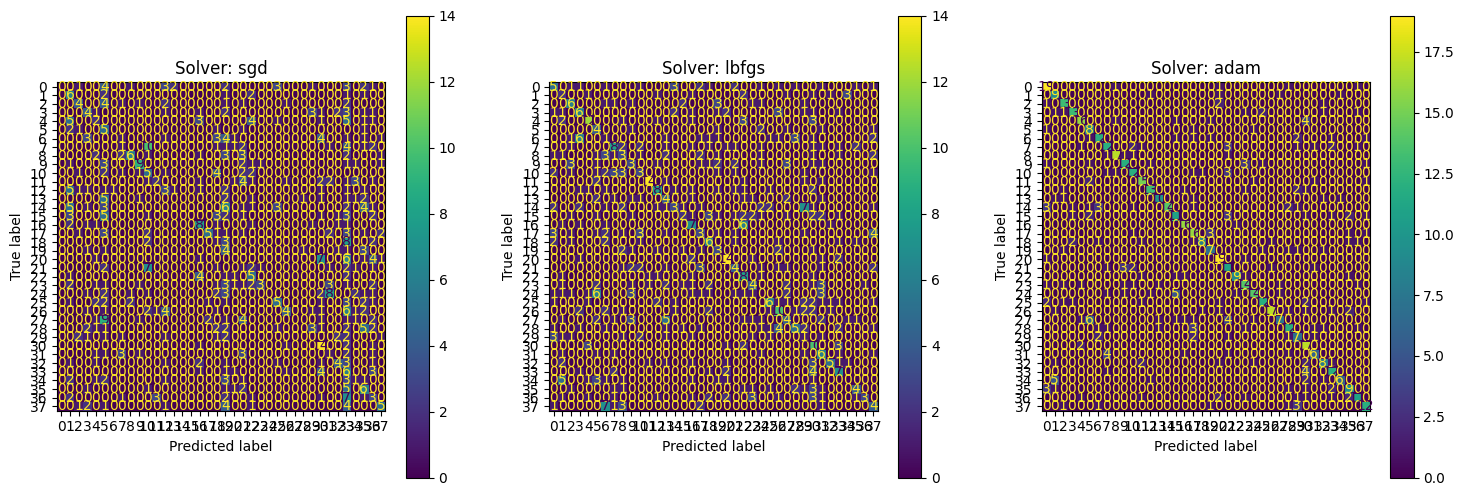

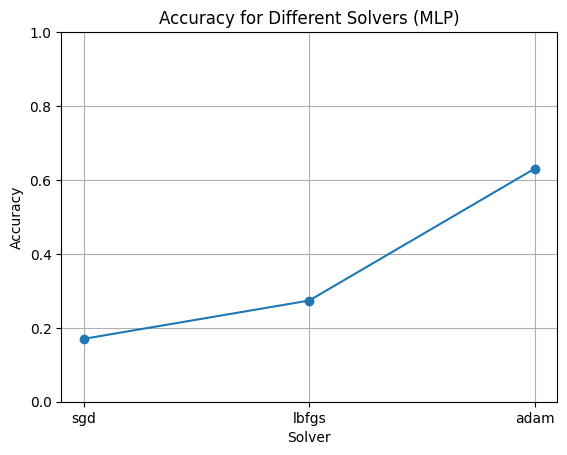

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

solvers = ['sgd', 'lbfgs', 'adam']
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes=hidden_layers, verbose=False, activation=activation, tol=1e-6, max_iter=int(1e6))

accuracies = []  # 用來收集準確率
confusion_matrices = []  # 用來收集混淆矩陣

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 創建 1x3 的子圖

for i, solver in enumerate(solvers):
    clf_MLP = MLPClassifier(solver=solver, **opts)
    clf_MLP.fit(Z_train, y_train)
    y_pred = clf_MLP.predict(Z_test)

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率

    print(f"Solver: {solver}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

    # 繪製混淆矩陣
    disp = ConfusionMatrixDisplay.from_estimator(clf_MLP, Z_test, y_test, ax=axes[i])
    disp.ax_.set_title(f'Solver: {solver}')
    confusion_matrices.append(disp.confusion_matrix)  # 收集混淆矩陣

# 繪製準確率折線圖
plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

<hr>

#### <strong><font color=#29AB87>標準化資料分類結果： </font></strong> 

以下將列出將標準化之原始資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 94.47%

- Support Vector Machine : 94.74%

- Neural Network : 94.74%

準確率最高的分類器為 SVM 與 Neural Network  的 94.74% 。

<hr>

#### <strong><font color=#29AB87>主成分資料分類結果： </font></strong> 
主成分涵蓋原始資料之資訊量：
- 88.27%

以下將列出將主成分資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 76.49%

- Support Vector Machine : 83.96%

- Neural Network : 63.07%

準確率最高的分類器為 Support Vector Machine 的 83.96%

<hr>

#### <strong><font color=#D2691E>資料分類結果觀察： </font></strong> 

在此 Yale Face 的人臉資料中，觀察到使用標準化原始資料在三種不同分類器中，得到的分類準確率皆相當不錯且相差極小。
但在主成分資料中，三種分類器的分類準確率就有明顯的不同了。其中 SVM 的分類準確率是在兩種資料中表現最好的。